## F1 Score

In [20]:
import numpy as np

In [21]:
def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [22]:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [23]:
precision = 0.1
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

In [24]:
precision = 0.0
recall = 1.0
f1_score(precision, recall)

0.0

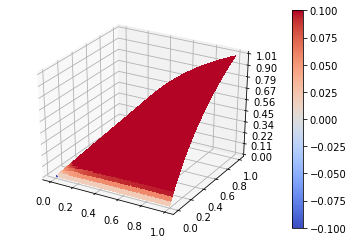

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
x, y = np.meshgrid(x, y)
z = f1_score(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [6]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9755555555555555

In [9]:
y_predict = log_reg.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [11]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [12]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [13]:
# sklearn中直接传入测试数据和预测数据即可
# 被召回率拉低了
# 这个比起score能更好衡量模型
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723